In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
from sklearn.metrics import mean_absolute_error
import mysql.connector
import sklearn


In [8]:
sklearn_version = sklearn.__version__

print(sklearn_version)

0.24.2


In [9]:
col_1=0

In [10]:

from mysql.connector import errorcode
# Current date time in local system 
from datetime import datetime 

#col_1 varaible stores the index values
col_1 = col_1+1 

#col_2 variable stores the timestamp value
col_2 = datetime.now()

#print the id and timestamp
print('ID:',col_1)
print('Timestamp:',col_2)

#Below code is to connect the Python with MySQL
try:
        #open a connection to the MySQL server
        # please add your mySQL user and password and the corresponding database name 
        cnct = mysql.connector.connect(host = 'localhost',user='root',port='3306',password = '^loggeringlogging#2019$',database='test')
     
        #create a new cursor
        cursor = cnct.cursor()
        #INSERT statements are stored in the variables called SQsql_queryLQuery
        sql_query = ("insert into details "
                    "(Id,Time)" 
                    "values(%(id)s,%(time)s)")
        #The data to be inserted is stored in the variable info
        info =  {
                    'id': col_1,
                    'time': col_2
                  }
        cursor.execute(sql_query,info)
        cnct.commit()
                   
#to handle the errors

except mysql.connector.Error as err:
    if err.errno == errorcode.ER_ACCESS_DENIED_ERROR:
        print("Something is wrong with your user name or password")
    elif err.errno == errorcode.ER_BAD_DB_ERROR:
        print("Database does not exist")
    else:
        print(err)
else:
    cnct.close()

ID: 1
Timestamp: 2022-01-30 13:17:50.304793


In [11]:
df=pd.read_csv(r"C:\Users\shubh\Downloads\qsar_fish_toxicity.csv")

In [12]:
df.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
0,3.26,0.83,1.68,0,1,1.45,3.77
1,2.19,0.58,0.86,0,0,1.35,3.12
2,2.13,0.64,0.83,0,0,1.35,3.53
3,3.03,0.33,1.47,1,0,1.81,3.51
4,2.09,0.83,0.86,0,0,1.89,5.39


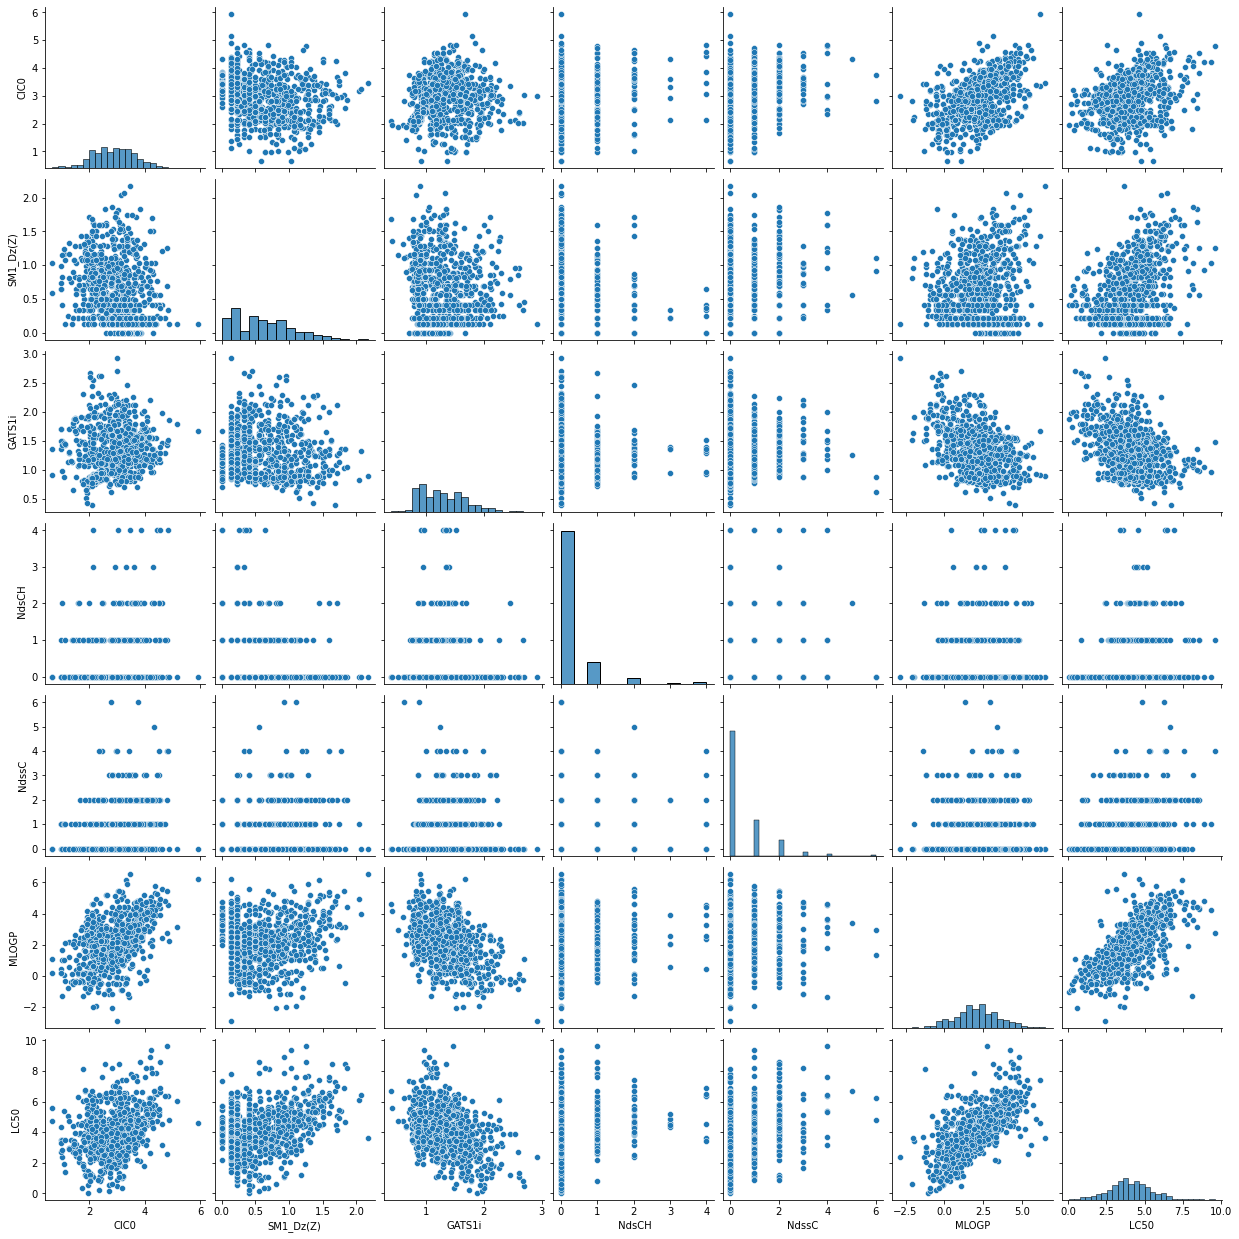

In [13]:
sns.pairplot(data=df)

<AxesSubplot:xlabel='MLOGP', ylabel='LC50'>

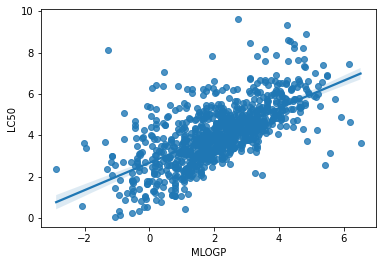

In [14]:
sns.regplot(x=df['MLOGP'],y=df['LC50'])


<AxesSubplot:xlabel='GATS1i', ylabel='LC50'>

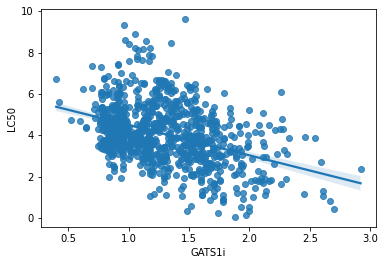

In [15]:
sns.regplot(x=df['GATS1i'],y=df['LC50'])

In [16]:
df.describe()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
count,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000,908.000000
mean,2.898789,0.628238,1.294053,0.229075,0.485683,2.109714,4.064923
std,0.756082,0.429321,0.394419,0.605335,0.861279,1.433275,1.455571
min,0.670000,0.000000,0.400000,0.000000,0.000000,-2.880000,0.050000
25%,2.347500,0.220000,0.950000,0.000000,0.000000,1.210000,3.150000
50%,2.935000,0.570000,1.240000,0.000000,0.000000,2.130000,3.985000
75%,3.410000,0.892500,1.560000,0.000000,1.000000,3.110000,4.910000
max,5.930000,2.170000,2.920000,4.000000,6.000000,6.520000,9.610000


In [17]:
df.corr(method='pearson')

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,LC50
CIC0,1.000000,-0.235702,0.147277,0.121271,0.246521,0.463996,0.291901
SM1_Dz(Z),-0.235702,1.000000,-0.146012,-0.140906,0.163449,0.200302,0.410675
GATS1i,0.147277,-0.146012,1.000000,-0.010635,0.093059,-0.450725,-0.397858
NdsCH,0.121271,-0.140906,-0.010635,1.000000,0.188164,0.048530,0.171962
NdssC,0.246521,0.163449,0.093059,0.188164,1.000000,0.028550,0.172391
MLOGP,0.463996,0.200302,-0.450725,0.048530,0.028550,1.000000,0.651517
LC50,0.291901,0.410675,-0.397858,0.171962,0.172391,0.651517,1.000000


LC50 has high positive correlation with MLOGP, positive correlation with SM1_Dz(Z), high negative correlation with GATS1i, and small positive correlation with the rest 


In [18]:
X = df.iloc[:, :6].values
y=df.iloc[:,6].values

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error
plt.style.use('fivethirtyeight')

**K-Nearest Neighbor(KNN)**

In [20]:
def KNN():
  return 0

In [21]:
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=11)

In [23]:
start_time=time.time()
knn_pred=[]
for k in range(2,10):
  knn=KNeighborsRegressor(n_neighbors=k)
  knn.fit(X_train,y_train)
  knn_pred.append(knn.score(X_train,y_train))
  print("R Squared for k: ", k," is ",knn.score(X_train,y_train))



R Squared for k:  2  is  0.8593630502391278
R Squared for k:  3  is  0.816088621024991
R Squared for k:  4  is  0.7858272568094633
R Squared for k:  5  is  0.764176570321676
R Squared for k:  6  is  0.7424852686377671
R Squared for k:  7  is  0.740663689153519
R Squared for k:  8  is  0.7301379235153489
R Squared for k:  9  is  0.7226373870876103


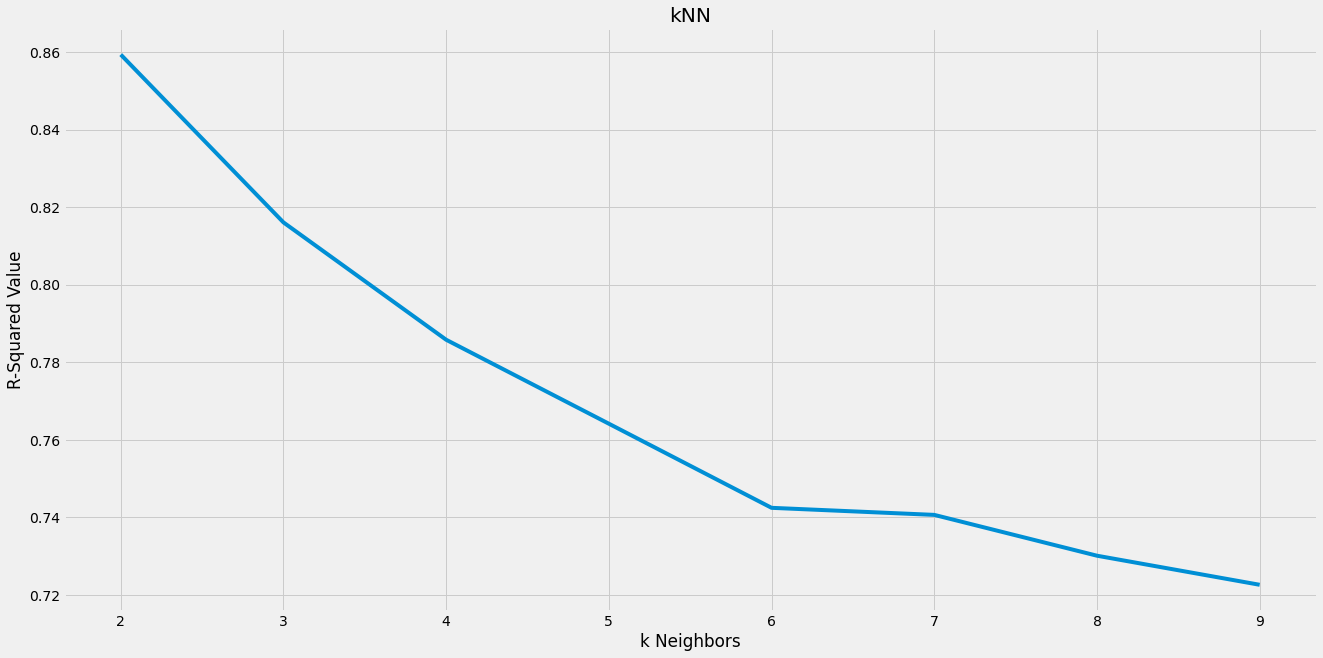

In [24]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(2, 10)], knn_pred)
plt.xlabel('k Neighbors')
plt.ylabel('R-Squared Value')
plt.title('kNN')
plt.show()

In [25]:
knn=KNeighborsRegressor(n_neighbors=2).fit(X_train,y_train)
training_time_knn=time.time()-start_time
knn_train_predictions=knn.predict(X_train)
knn_train_rscore = knn.score(X_train,y_train) 
knn_train_rmse=np.sqrt(mean_squared_error(y_train,knn_train_predictions))

print(training_time_knn)

0.47086524963378906


Every estimator or model in Scikit-learn has a score method after being trained on the data, usually X_train, y_train.

When you call **score** on classifiers like LogisticRegression, RandomForestClassifier, etc. the method computes the accuracy score by default. By default, the score method does not need the actual predictions.

When using accuracy_score you need ready predictions, i.e. the function does not generate prediction using the test set under the hood.

In [26]:
print("R squared for Training data: ", knn_train_rscore)
print("Root Mean Squared Error for Training data: ", knn_train_rmse)

R squared for Training data:  0.8593630502391278
Root Mean Squared Error for Training data:  0.5381484812566025


In [27]:
start_time2=time.time()
knn_test_predictions=knn.predict(X_test)
testing_time_knn=time.time()-start_time2
knn_test_rscore=knn.score(X_test,y_test)
knn_test_rmse=np.sqrt(mean_squared_error(y_test, knn_test_predictions))
knn_test_mae = mean_absolute_error(y_test, knn_test_predictions)
print(testing_time_knn)

0.00398707389831543


In [28]:
print("R squared for Testing data: ", knn_test_rscore)
print("Root Mean Squared Error for Testing data: ", knn_test_rmse)
print("Mean Absolute Error for Testing data: ", knn_test_mae)


R squared for Testing data:  0.5013273160318797
Root Mean Squared Error for Testing data:  1.075166547282608
Mean Absolute Error for Testing data:  0.7730494505494505


In [29]:
def KNN():
  return {'Regressor Model':'KNN',
          'Predictions':knn_test_predictions,
          'R Squared': knn_test_rscore,
          'Mean Absolute Error':knn_test_mae,
          'Root Mean Squared Error':knn_test_rmse,
          'Training Time': training_time_knn,
          'Prediction Time':testing_time_knn}


In [30]:
def test(n):
    x=knn.predict(n)
    return x
%timeit test([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])

428 µs ± 39.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [31]:
def value(n):
    x=knn.predict(n)
    return x
value([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])[0]

4.97

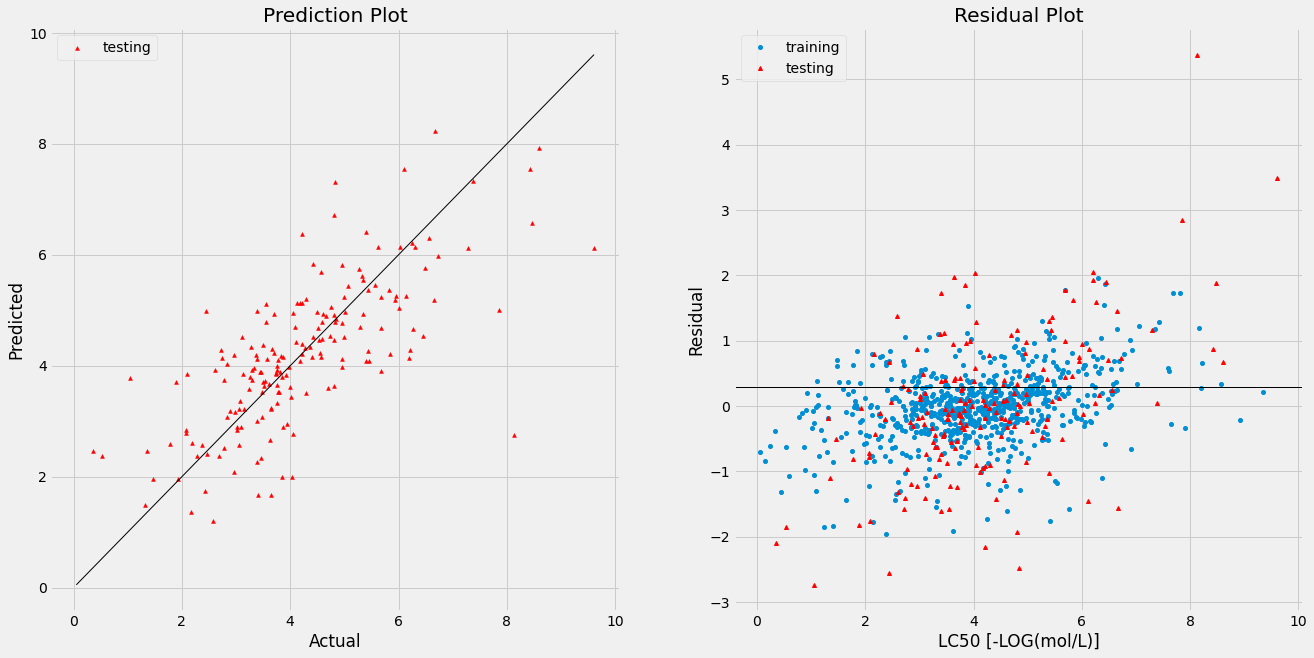

In [32]:
residual_train = y_train - knn_train_predictions
residual_test = y_test - knn_test_predictions

fig=plt.figure(figsize=(20,10))

ax1=plt.subplot(1,2,1)
#ax1.scatter(y_train, knn_train_predictions, s=15, label='training')
ax1.scatter(y_test, knn_test_predictions, marker='^', s=15, c='r', label='testing')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=1)
ax1.set_title('Prediction Plot')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.plot(y_train, residual_train, 'o', markersize= 4, label='training')
ax2.plot(y_test, residual_test, '^', c='red', markersize= 4, label='testing')
ax2.axhline(y=0.3, linewidth= 1, linestyle='-', c='black')
ax2.legend()
ax2.set_title('Residual Plot')
ax2.set_xlabel('LC50 [-LOG(mol/L)]')
ax2.set_ylabel('Residual')

plt.show()

**MULTIPLE LINEAR REGRESSION**

In [33]:
X=df.iloc[:,:-1].values
y=df.iloc[:,6].values

In [34]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=22)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
start_time=time.time()
mlr=LinearRegression()
mlr.fit(X_train,y_train)
training_time_mlr=time.time()-start_time

In [37]:
mlr_train_rscore=mlr.score(X_train,y_train)
mlr_train_pred=mlr.predict(X_train)
mlr_train_rmse=np.sqrt(mean_squared_error(y_train,mlr_train_pred))

In [38]:
print("R squared for Training data: ", mlr_train_rscore)
print("Root Mean Squared Error for Training data: ", mlr_train_rmse)

R squared for Training data:  0.5918190790531901
Root Mean Squared Error for Training data:  0.9314021289100801


In [39]:
import timeit

In [40]:
mlr_test_rscore=mlr.score(X_test,y_test)
start_time2=time.time()
mlr_test_pred=mlr.predict(X_test)
testing_time_mlr=time.time()-start_time2
mlr_test_rmse=np.sqrt(mean_squared_error(y_test,mlr_test_pred))
mlr_test_mae=mean_absolute_error(y_test,mlr_test_pred)

In [41]:
print("R squared for Testing data: ", mlr_test_rscore)
print("Root Mean Squared Error for Testing data: ", mlr_test_rmse)
print("Mean Absolute Error for Testing data: ", mlr_test_mae)

R squared for Testing data:  0.5136215283077674
Root Mean Squared Error for Testing data:  1.0059287466017057
Mean Absolute Error for Testing data:  0.6702181897751869


In [42]:
def MLR():
  return {'Regressor Model':'Multiple Linear Regression',
          'Predictions':mlr_test_pred,
          'R Squared': mlr_test_rscore,
          'Mean Absolute Error':mlr_test_mae,
          'Root Mean Squared Error':mlr_test_rmse,
          'Training Time': training_time_mlr,
          'Prediction Time':testing_time_mlr}

In [43]:
def test(n):
    x=mlr.predict(n)
    return x
%timeit test([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])

44.9 µs ± 3.73 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [44]:
def value(n):
    x=mlr.predict(n)
    return x
value([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])[0]

3.9368946495999655

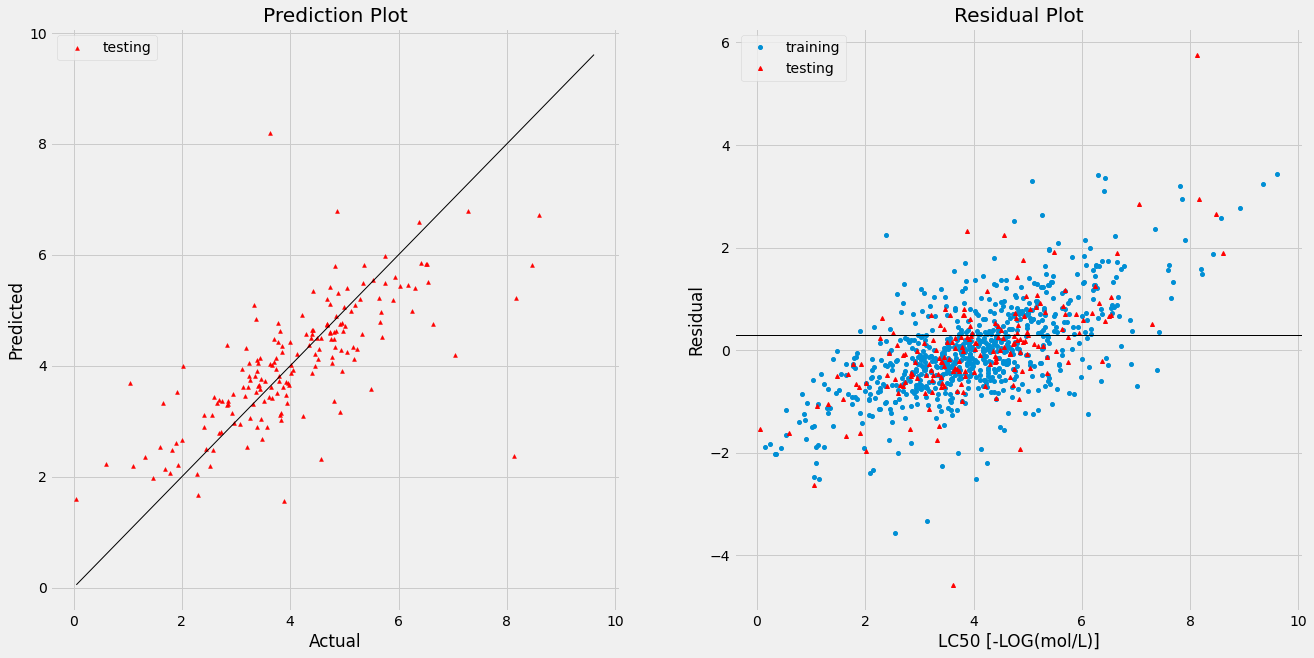

In [45]:
residual_train = y_train - mlr_train_pred
residual_test = y_test - mlr_test_pred

fig=plt.figure(figsize=(20,10))

ax1=plt.subplot(1,2,1)
#ax1.scatter(y_train, mlr_train_pred, s=15, label='training')
ax1.scatter(y_test, mlr_test_pred, marker='^', s=15, c='r', label='testing')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=1)
ax1.set_title('Prediction Plot')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.plot(y_train, residual_train, 'o', markersize= 4, label='training')
ax2.plot(y_test, residual_test, '^', c='red', markersize= 4, label='testing')
ax2.axhline(y=0.3, linewidth= 1, linestyle='-', c='black')
ax2.legend()
ax2.set_title('Residual Plot')
ax2.set_xlabel('LC50 [-LOG(mol/L)]')
ax2.set_ylabel('Residual')

plt.show()

Thus, as seen from the accuracy metrics and residual plots , MLR performs better than K-Nearest Neighbors, predicting LC50 value for input molecular descriptors 1.4 microseconds faster

**XGBOOST**

In [46]:
import xgboost

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True, random_state=33)

In [48]:
#Estimating optimum max_depth and n_estimators
start_time=time.time()
xgb_params=[]
depth=[1,3,6,9,12]
for d in depth:
  xgb=xgboost.XGBRegressor(objective ='reg:squarederror',max_depth=d).fit(X_train,y_train)
  xgb_params.append(xgb.score(X_train,y_train))
  print("R Squared value for max_depth ",d,"is ",xgb.score(X_train,y_train))
  p=xgb.predict(X_test)
  print("RMSE for testing max_depth ",d,"is ",np.sqrt(mean_squared_error(y_test,p)))

R Squared value for max_depth  1 is  0.6767552621696855
RMSE for testing max_depth  1 is  1.0024444150767398
R Squared value for max_depth  3 is  0.9075943464509498
RMSE for testing max_depth  3 is  1.001922616868227
R Squared value for max_depth  6 is  0.9899880832522692
RMSE for testing max_depth  6 is  1.0435667623945033
R Squared value for max_depth  9 is  0.992170331959404
RMSE for testing max_depth  9 is  1.0617971445281003
R Squared value for max_depth  12 is  0.9921733341838066
RMSE for testing max_depth  12 is  1.0578323458058958


In [49]:
xgb_p=xgboost.XGBRegressor(objective='reg:squarederror',max_depth=2).fit(X_train,y_train)
training_time_xgb=time.time()-start_time

In [50]:
xgb_p_train_rscore=xgb_p.score(X_train,y_train)
start_time2=time.time()
xgb_p_train_pred=xgb_p.predict(X_train)
testing_time_xgb=time.time()-start_time2
xgb_p_train_rmse=np.sqrt(mean_squared_error(y_train,xgb_p_train_pred))

In [51]:
print("R squared for Training data: ", xgb_p_train_rscore)
print("Root Mean Squared Error for Training data: ", xgb_p_train_rmse)

R squared for Training data:  0.8238061267128466
Root Mean Squared Error for Training data:  0.5946678303099998


In [52]:
xgb_p_test_rscore=xgb_p.score(X_test,y_test)
start_time2=time.time()
xgb_p_test_pred=xgb_p.predict(X_test)
testing_time=time.time()-start_time2
xgb_p_test_rmse=np.sqrt(mean_squared_error(y_test,xgb_p_test_pred))
xgb_p_test_mae=mean_absolute_error(y_test,xgb_p_test_pred)

In [53]:
print("R squared for Testing data: ", xgb_p_test_rscore)
print("Root Mean Squared Error for Testing data: ", xgb_p_test_rmse)
print("Mean Absolute Error for Testing data: ", xgb_p_test_rmse)

R squared for Testing data:  0.603795083597152
Root Mean Squared Error for Testing data:  1.0040602737072535
Mean Absolute Error for Testing data:  1.0040602737072535


In [54]:
def XGB():
  return {'Regressor Model':'XGBoost',
          'Predictions':xgb_p_test_pred,
          'R Squared': xgb_p_test_rscore,
          'Mean Absolute Error':xgb_p_test_mae,
          'Root Mean Squared Error':xgb_p_test_rmse,
          'Training Time': training_time_xgb,
          'Prediction Time':testing_time_xgb}

In [55]:
def test(n):
    x=xgb_p.predict(n)
    return x
%timeit test([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])

2.74 ms ± 29.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [56]:
def value(n):
    x=xgb_p.predict(n)
    return x
value([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])[0]

4.0381985

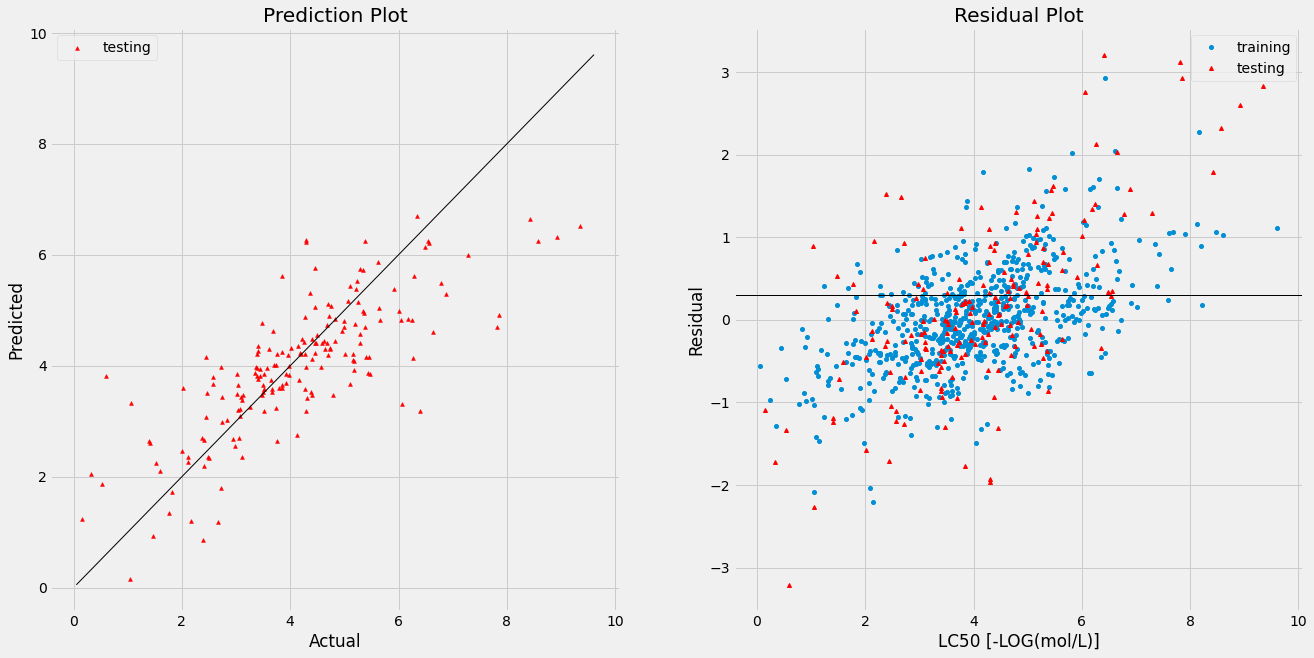

In [57]:
residual_train = y_train - xgb_p_train_pred
residual_test = y_test - xgb_p_test_pred

fig=plt.figure(figsize=(20,10))

ax1=plt.subplot(1,2,1)
#ax1.scatter(y_train, xgb_p_train_pred, s=15, label='training')
ax1.scatter(y_test, xgb_p_test_pred, marker='^', s=15, c='r', label='testing')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=1)
ax1.set_title('Prediction Plot')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.plot(y_train, residual_train, 'o', markersize= 4, label='training')
ax2.plot(y_test, residual_test, '^', c='red', markersize= 4, label='testing')
ax2.axhline(y=0.3, linewidth= 1, linestyle='-', c='black')
ax2.legend()
ax2.set_title('Residual Plot')
ax2.set_xlabel('LC50 [-LOG(mol/L)]')
ax2.set_ylabel('Residual')

plt.show()

XGBoost with optimum parameters: max_depth = 2. Best R Squared of 0.61 and Least RMSE of 0.98,

 But takes 409 microseconds per loop

**SVM Regressor**

In [58]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

In [59]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,shuffle=True, random_state=44)

In [61]:
start_time=time.time()
clf=svm.SVR(C=1,gamma=0.1)
clf.fit(X_train,y_train)
training_time_svm=time.time()-start_time


In [62]:
clf_train_rscore=clf.score(X_train,y_train)
clf_train_pred=clf.predict(X_train)
clf_train_rmse=np.sqrt(mean_squared_error(y_train,clf_train_pred))

In [63]:
print("R squared for Training data: ",clf_train_rscore)
print("Root Mean Squared Error for Training data: ", clf_train_rmse)

R squared for Training data:  0.6919621034597634
Root Mean Squared Error for Training data:  0.8041015948054065


In [64]:
clf_test_rscore=clf.score(X_test,y_test)
start_time2=time.time()
clf_test_pred=clf.predict(X_test)
testing_time_svm=time.time()-start_time2
clf_test_rmse=np.sqrt(mean_squared_error(y_test,clf_test_pred))
clf_test_mae=mean_absolute_error(y_test,clf_test_pred)

In [65]:
print("R squared for Testing data: ", clf_test_rscore)
print("Root Mean Squared Error for Testing data: ", clf_test_rmse)
print("Mean Absolute Error for Testing data: ", clf_test_mae)

R squared for Testing data:  0.5912428583106744
Root Mean Squared Error for Testing data:  0.944880532332521
Mean Absolute Error for Testing data:  0.6403753016225676


In [66]:
def SVM():
  return {'Regressor Model':'SVM Regressor',
          'Predictions':clf_test_pred,
          'R Squared': clf_test_rscore,
          'Mean Absolute Error':clf_test_mae,
          'Root Mean Squared Error':clf_test_rmse,
          'Training Time': training_time_svm,
          'Prediction Time':testing_time_svm}

In [67]:
def test(n):
    x=clf.predict(n)
    return x
%timeit test([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])

131 µs ± 30.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [68]:
def value(n):
    x=clf.predict(n)
    return x
value([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])[0]

5.487029312656349

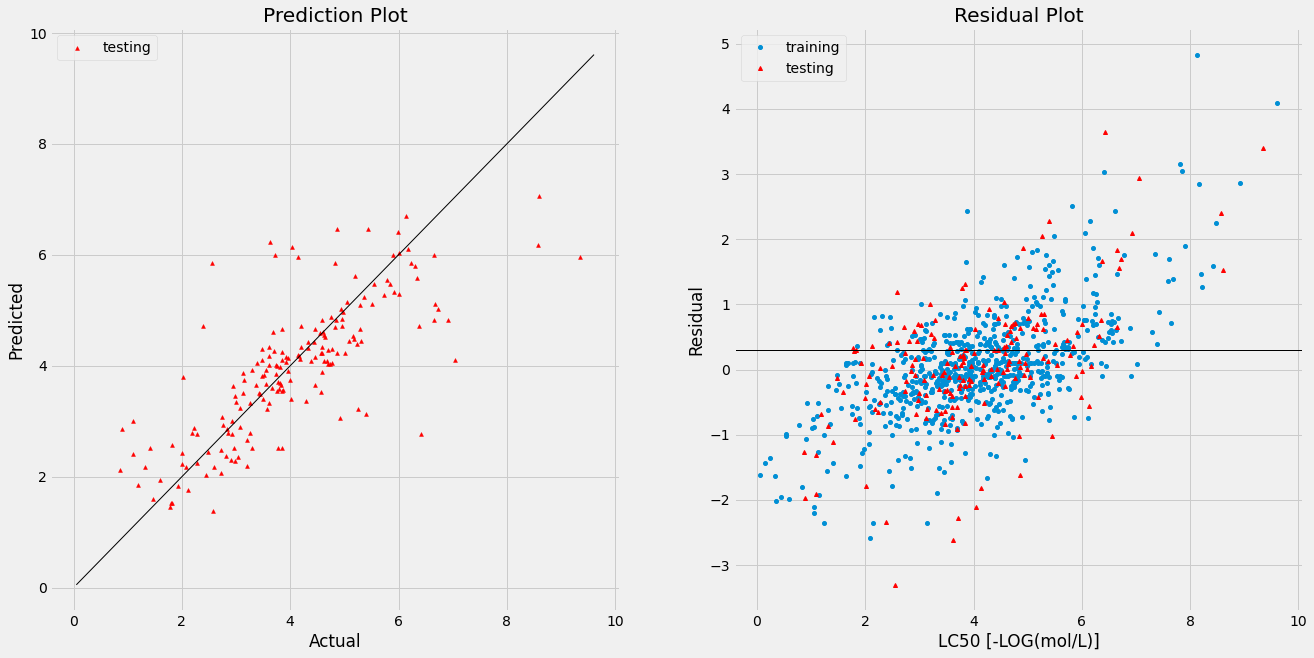

In [69]:
residual_train = y_train - clf_train_pred
residual_test = y_test - clf_test_pred

fig=plt.figure(figsize=(20,10))

ax1=plt.subplot(1,2,1)
#ax1.scatter(y_train, clf_train_pred, s=15, label='training')
ax1.scatter(y_test, clf_test_pred, marker='^', s=15, c='r', label='testing')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=1)
ax1.set_title('Prediction Plot')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.plot(y_train, residual_train, 'o', markersize= 4, label='training')
ax2.plot(y_test, residual_test, '^', c='red', markersize= 4, label='testing')
ax2.axhline(y=0.3, linewidth= 1, linestyle='-', c='black')
ax2.legend()
ax2.set_title('Residual Plot')
ax2.set_xlabel('LC50 [-LOG(mol/L)]')
ax2.set_ylabel('Residual')

plt.show()

**RANDOM FOREST**

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=66)

In [72]:
start_time=time.time()
rf=RandomForestRegressor(max_depth=6,max_features=0.4).fit(X_train,y_train)
training_time_rf=time.time()-start_time

In [73]:
rf_train_rscore=rf.score(X_train,y_train)
rf_train_pred=rf.predict(X_train)
rf_train_rmse=np.sqrt(mean_squared_error(y_train,rf_train_pred))

In [74]:
print("R squared for Training data: ",rf_train_rscore)
print("Root Mean Squared Error for Training data: ", rf_train_rmse)

R squared for Training data:  0.7790979917365222
Root Mean Squared Error for Training data:  0.6961323886221957


In [75]:
rf_test_rscore=rf.score(X_test,y_test)
start_time2=time.time()
rf_test_pred=rf.predict(X_test)
testing_time_rf=time.time()-start_time2
rf_test_rmse=np.sqrt(mean_squared_error(y_test,rf_test_pred))
rf_test_mae=mean_absolute_error(y_test,rf_test_pred)

In [76]:
print("R squared for Testing data: ",rf_test_rscore)
print("Root Mean Squared Error for Testing data: ", rf_test_rmse)
print("Mean Absolute Error for Testing data: ", rf_test_mae)

R squared for Testing data:  0.5809911757224018
Root Mean Squared Error for Testing data:  0.864514766681271
Mean Absolute Error for Testing data:  0.6651877350288098


In [77]:
def RF():
  return {'Regressor Model':'Random Forest Regressor',
          'Predictions':rf_test_pred,
          'R Squared': rf_test_rscore,
          'Mean Absolute Error':rf_test_mae,
          'Root Mean Squared Error':rf_test_rmse,
          'Training Time': training_time_rf,
          'Prediction Time':testing_time_rf}

In [78]:
def test(n):
    x=rf.predict(n)
    return x
%timeit test([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])

7.18 ms ± 704 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [79]:
def value(n):
    x=clf.predict(n)
    return x
value([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])[0]

5.487029312656349

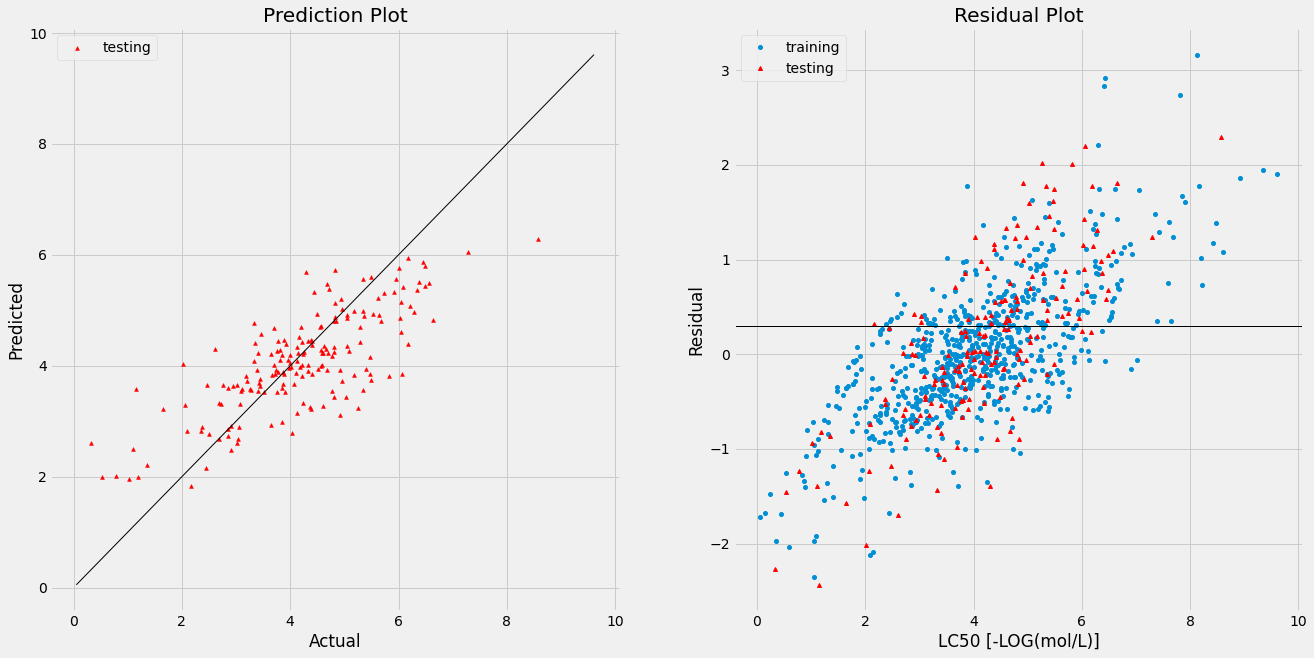

In [80]:
residual_train = y_train - rf_train_pred
residual_test = y_test - rf_test_pred

fig=plt.figure(figsize=(20,10))

ax1=plt.subplot(1,2,1)
#ax1.scatter(y_train, rf_train_pred, s=15, label='training')
ax1.scatter(y_test, rf_test_pred, marker='^', s=15, c='r', label='testing')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=1)
ax1.set_title('Prediction Plot')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.plot(y_train, residual_train, 'o', markersize= 4, label='training')
ax2.plot(y_test, residual_test, '^', c='red', markersize= 4, label='testing')
ax2.axhline(y=0.3, linewidth= 1, linestyle='-', c='black')
ax2.legend()
ax2.set_title('Residual Plot')
ax2.set_xlabel('LC50 [-LOG(mol/L)]')
ax2.set_ylabel('Residual')

plt.show()

**BAYESIAN RIDGE REGRESSOR**

In [81]:
from sklearn.linear_model import BayesianRidge

In [82]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=77)

In [83]:
start_time=time.time()
Bayesian=BayesianRidge(n_iter=5000).fit(X_train,y_train)
training_time_bayesian=time.time()-start_time

In [84]:
Bayesian_train_rscore=Bayesian.score(X_train,y_train)
Bayesian_train_pred=Bayesian.predict(X_train)
Bayesian_train_rmse=np.sqrt(mean_squared_error(y_train,Bayesian_train_pred))

In [85]:
print("R squared for Training data: ",Bayesian_train_rscore)
print("Root Mean Squared Error for Training data: ", Bayesian_train_rmse)

R squared for Training data:  0.5964265737184123
Root Mean Squared Error for Training data:  0.9202046289077244


In [86]:
Bayesian_test_rscore=Bayesian.score(X_test,y_test)
start_time2=time.time()
Bayesian_test_pred=Bayesian.predict(X_test)
testing_time_bayesian=time.time()-start_time2
Bayesian_test_rmse=np.sqrt(mean_squared_error(y_test,Bayesian_test_pred))
Bayesian_test_mae=mean_absolute_error(y_test,Bayesian_test_pred)

In [87]:
print("R squared for Testing data: ",Bayesian_test_rscore)
print("Root Mean Squared Error for Testing data: ", Bayesian_test_rmse)
print("Mean Absolute Error for Testing data: ", Bayesian_test_mae)

R squared for Testing data:  0.4890448703639476
Root Mean Squared Error for Testing data:  1.0533313842915721
Mean Absolute Error for Testing data:  0.7771762536365515


In [88]:
def BAYESIAN_RIDGE():
  return {'Regressor Model':'Bayesian Ridge Regressor',
          'Predictions':Bayesian_test_pred,
          'R Squared': Bayesian_test_rscore,
          'Mean Absolute Error':Bayesian_test_mae,
          'Root Mean Squared Error':Bayesian_test_rmse,
          'Training Time': training_time_bayesian,
          'Prediction Time':testing_time_bayesian}

In [89]:
def test(n):
    x=Bayesian.predict(n)
    return x
%timeit test([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])

50 µs ± 5.62 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [90]:
def value(n):
    x=Bayesian.predict(n)
    return x
value([[3.59, 0.43, 1.38, 0.  , 2.  , 1.97]])[0]

3.906289940324391

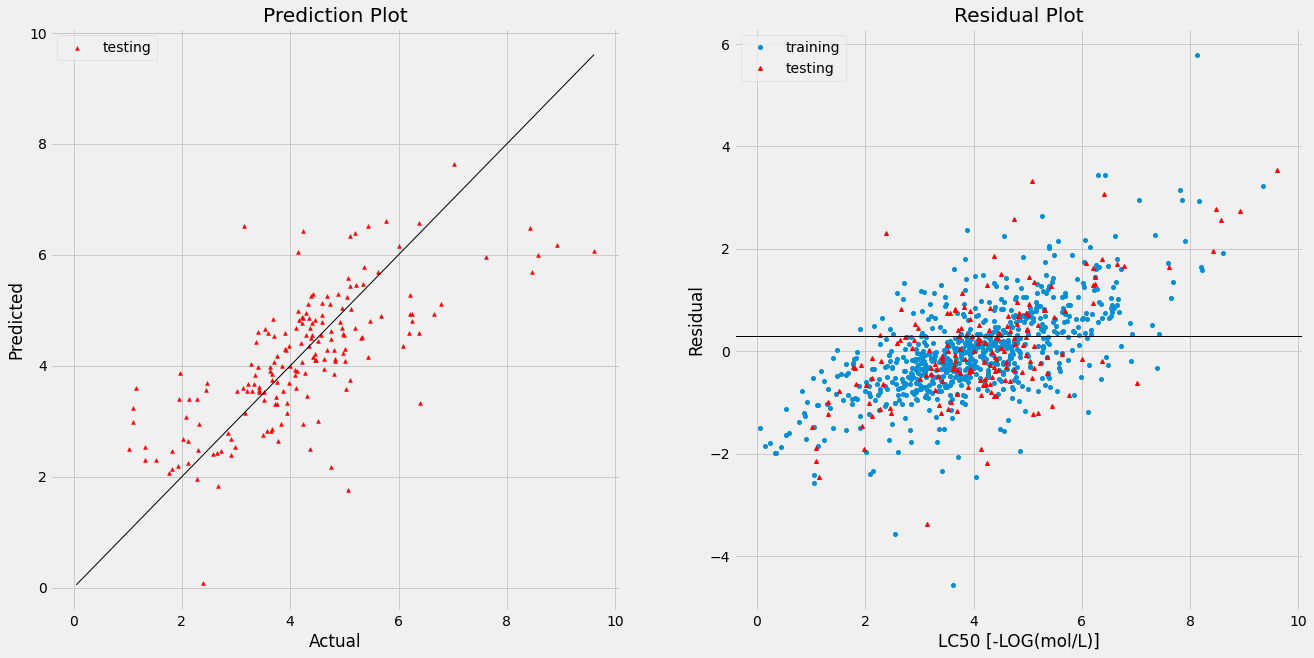

In [91]:
residual_train = y_train - Bayesian_train_pred
residual_test = y_test - Bayesian_test_pred

fig=plt.figure(figsize=(20,10))

ax1=plt.subplot(1,2,1)
#ax1.scatter(y_train, Bayesian_train_pred, s=15, label='training')
ax1.scatter(y_test, Bayesian_test_pred, marker='^', s=15, c='r', label='testing')
ax1.plot([y.min(), y.max()], [y.min(), y.max()], 'k', lw=1)
ax1.set_title('Prediction Plot')
ax1.set_xlabel('Actual')
ax1.set_ylabel('Predicted')
ax1.legend()

ax2=plt.subplot(1,2,2)
ax2.plot(y_train, residual_train, 'o', markersize= 4, label='training')
ax2.plot(y_test, residual_test, '^', c='red', markersize= 4, label='testing')
ax2.axhline(y=0.3, linewidth= 1, linestyle='-', c='black')
ax2.legend()
ax2.set_title('Residual Plot')
ax2.set_xlabel('LC50 [-LOG(mol/L)]')
ax2.set_ylabel('Residual')

plt.show()

In [92]:
models={}

In [93]:
models[1]=BAYESIAN_RIDGE()
models[2]=RF()
models[3]=SVM()
models[4]=XGB()
models[5]=MLR()
models[6]=KNN()

In [94]:
models

{1: {'Regressor Model': 'Bayesian Ridge Regressor',
  'Predictions': array([5.69420839, 2.14352465, 3.83178445, 3.52209419, 4.5123073 ,
         6.15811652, 2.54025955, 4.06222153, 4.22179137, 3.15251025,
         2.49217009, 4.60738019, 2.75445169, 3.59300915, 2.67254261,
         6.51130888, 2.6431392 , 6.00448657, 4.67536677, 3.32015859,
         4.90629901, 3.99539013, 7.63411953, 3.9850567 , 4.27598838,
         3.85184547, 4.20463301, 5.24097216, 4.14914058, 4.1711541 ,
         3.58906003, 2.50047462, 3.39582234, 4.94836085, 3.5457251 ,
         3.52203366, 3.66939171, 6.42993896, 3.8426746 , 2.41438809,
         4.79375078, 3.83119954, 5.69032893, 3.39582234, 4.82283486,
         2.45989885, 2.46749695, 2.19285581, 3.56156851, 4.92799012,
         3.43272931, 5.13295855, 4.81429632, 3.68576661, 4.06396687,
         4.93967871, 4.58817727, 2.94633764, 4.08020937, 4.03739848,
         5.25440311, 3.31538813, 4.58385649, 4.50420905, 4.35648527,
         4.79869273, 4.30813937, 3.2

In [95]:
model_table=pd.DataFrame.from_dict(models,orient='index')
model_table

,Regressor Model,Predictions,R Squared,Mean Absolute Error,Root Mean Squared Error,Training Time,Prediction Time
1,Bayesian Ridge Regressor,"[5.694208385724655, 2.1435246537653643, 3.8317...",0.489045,0.777176,1.053331,0.006816,0.000000
2,Random Forest Regressor,"[3.6484671169785905, 3.8155709986164483, 4.015...",0.580991,0.665188,0.864515,0.136701,0.015044
3,SVM Regressor,"[4.821248249092657, 4.7245832133532595, 4.5263...",0.591243,0.640375,0.944881,0.049928,0.013974
4,XGBoost,"[4.890248, 4.1524153, 3.9554272, 4.212599, 3.8...",0.603795,0.731340,1.004060,0.925802,0.003500
5,Multiple Linear Regression,"[4.0279572876957115, 4.752854094977971, 4.2552...",0.513622,0.670218,1.005929,0.026356,0.000000
6,KNN,"[4.154999999999999, 6.3100000000000005, 5.125,...",0.501327,0.773049,1.075167,0.470865,0.003987


In [96]:
names=['Bayesian Ridge','Random Forest','SVM ','XGBoost','MLR','KNN']
rmses=[i for i in model_table['Root Mean Squared Error']]
color=['red','yellow','blue','green','pink','black']

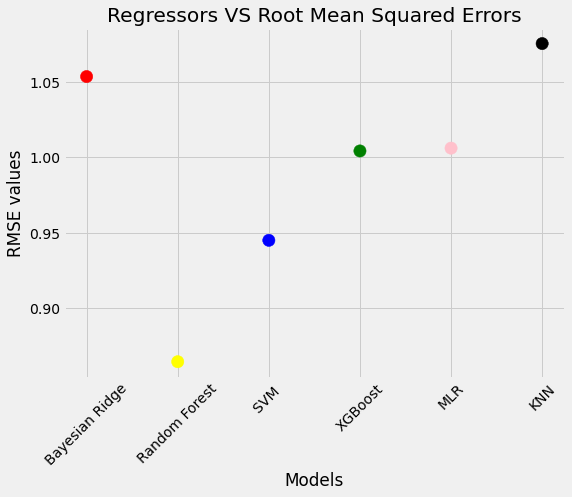

In [97]:

plt.figure(figsize=(8,6))
scatter = plt.scatter(names, 
            rmses,
            s=150,
            c=color)
plt.xlabel('Models')
plt.xticks(rotation='45')
plt.ylabel('RMSE values')
plt.title('Regressors VS Root Mean Squared Errors')
plt.show()

In [98]:
names=['Bayesian Ridge','Random Forest','SVM ','XGBoost','MLR','KNN']
preds=[i for i in model_table['Prediction Time']]
color=['red','yellow','blue','green','pink','black']

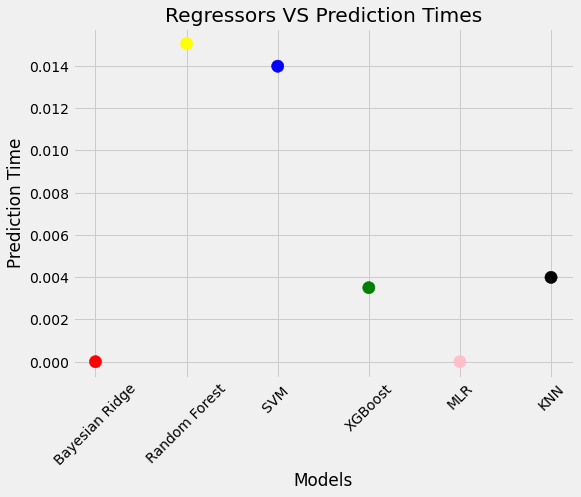

In [99]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(names, 
            preds,
            s=150,
            c=color)
plt.xlabel('Models')
plt.xticks(rotation='45')
plt.ylabel('Prediction Time')
plt.title('Regressors VS Prediction Times')
plt.show()

In [100]:
model_table.to_csv('models_final.csv')

In [101]:
filename = 'rf.sav'
pickle.dump(rf, open(filename, 'wb'))

Hence, after training and testing 6 different Regressor models we see that Random Forest Regressor performs the best with RMSE value of 0.866439

Since, the dataset is a science dataset, we can expect high RMSE values and low R Squared Accuracy Metrics since we are predicting a biological phenomena such as toxicity using chemical molecular descriptors instead of a marketing or sales prediction task. 

In [102]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_train, y_train)
print(result)

0.7483957671991366


In [107]:
loaded_model

RandomForestRegressor(max_depth=6, max_features=0.4)